In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import json

import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from pathlib import Path
from typing import List, Dict, Tuple, Union, Callable, Optional, Any
plt.rcParams.update({'font.size': 22})


In [2]:
surrogate_analysis_folder = "../analysis/surrogates/30_runs"
raw_mo_analysis_folder = "../analysis/raw_mo/30_runs"
seed_list = list(range(10,310,10))

In [5]:
def gather_surrogate_results(surrogate_analysis_folder: str, seed_list: List[int]) -> Dict[int, Dict[int, Dict[int, Dict[str, Any]]]]:
    """
    Gathers the results of the surrogate analysis.
    """
    size_seed_results = defaultdict(lambda: defaultdict(dict))
    for data_size in os.listdir(surrogate_analysis_folder):
        size_folder = os.path.join(surrogate_analysis_folder, data_size)
        for seed in os.listdir(size_folder): 
            seed_folder = os.path.join(size_folder, str(seed))
            with open(os.path.join(seed_folder, "pareto_metrics.json"), "r") as f:
                results = json.load(f)
            size_seed_results[int(data_size)][seed] = results
            
    return size_seed_results
    

In [6]:
def gather_raw_mo_results(raw_mo_analysis_folder: str, seed_list: List[int]) -> Dict[int, Dict[int, Dict[int, Dict[str, Any]]]]:
    """
    Gathers the results of the raw_mo analysis.
    """
    seed_results = defaultdict(lambda: defaultdict(dict))

    for seed in seed_list: 
        seed_folder = os.path.join(raw_mo_analysis_folder, str(seed))
        with open(os.path.join(seed_folder, "pareto_metrics.json"), "r") as f:
            results = json.load(f)
        
        seed_results[seed] = results
                
    return seed_results


In [7]:
raw_mo_results = gather_surrogate_results(raw_mo_analysis_folder, seed_list)


In [8]:
surr_mo_results = gather_surrogate_results(surrogate_analysis_folder, seed_list)

In [9]:
raw_mo_results.keys()

dict_keys([4000, 3000, 2000, 3500, 2500])

In [10]:
surr_mo_results.keys()

dict_keys([500, 2000, 1000, 0, 1500])

In [11]:
surr_mo_results[500]['80'].keys()

dict_keys(['hypervolume', 'avg_hypervolume', 'diameter', 'podist_avg', 'best_acc', 'hash_best_acc', 'best_train_time', 'hash_best_train_time', 'avg_acc', 'avg_train_time', 'std_acc', 'std_train_time'])

In [86]:
raw_mo_arch_sizes = sorted(list(raw_mo_results.keys()))
surr_mo_arch_sizes = sorted(list(surr_mo_results.keys()))
metric = "best_acc"
x_label = ""
y_label = "Best Accuracy"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = [round(surr_mo_results[surr_mo_arch_sizes[i]][seed][metric],2) for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()]
    raw_best_metric = [round(raw_mo_results[raw_mo_arch_sizes[i]][seed][metric],2) for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()]
    
    plt.clf()
    plt.boxplot([surr_best_metric, raw_best_metric], labels=[f"Surrogate: {surr_mo_arch_sizes[i]} archs", f"Random: {raw_mo_arch_sizes[i]} archs"])
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    plt.savefig(f"../analysis/plots/{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    #plt.show()
    
    plt.clf()
    

<Figure size 640x480 with 0 Axes>

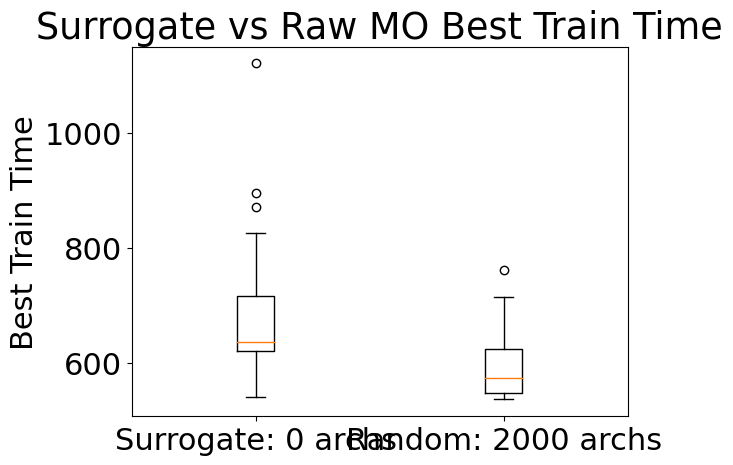

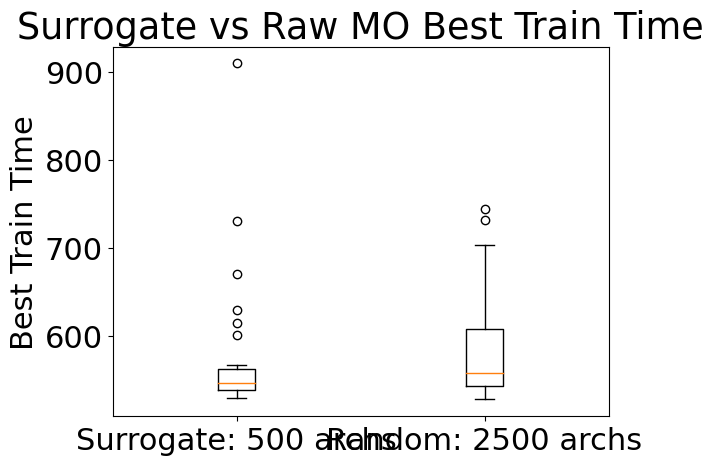

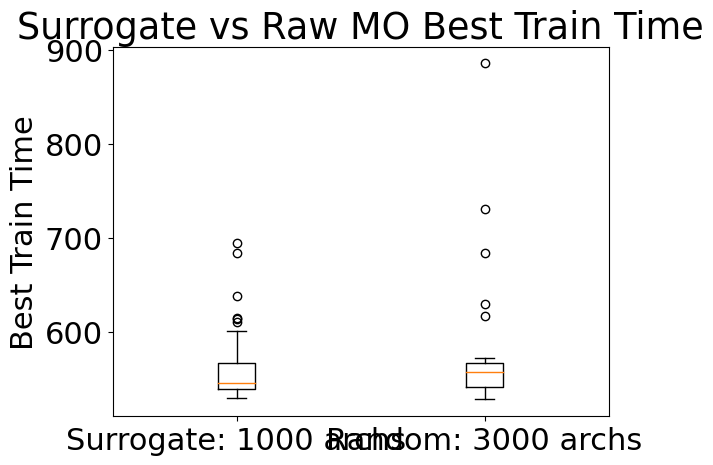

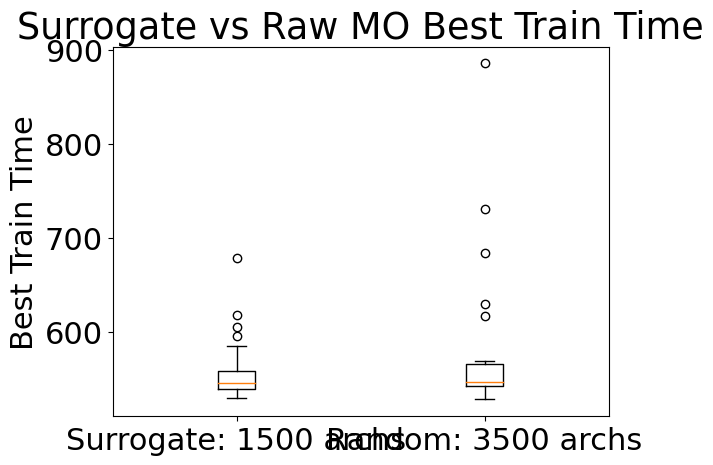

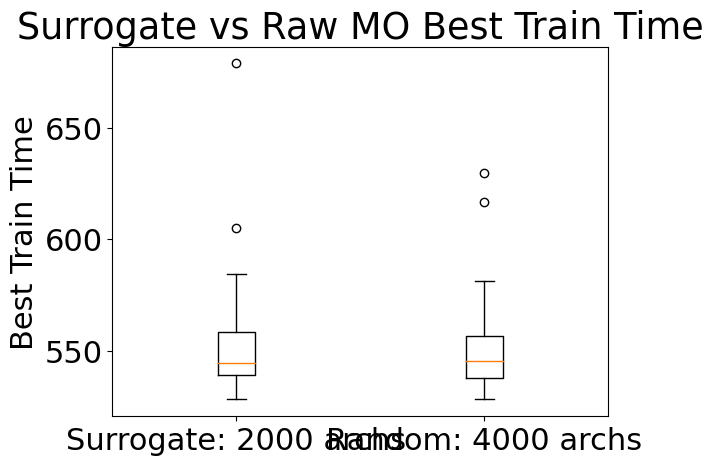

<Figure size 640x480 with 0 Axes>

In [14]:
raw_mo_arch_sizes = sorted(list(raw_mo_results.keys()))
surr_mo_arch_sizes = sorted(list(surr_mo_results.keys()))
metric = "best_train_time"
x_label = ""
y_label = "Best Train Time"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = [surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()]
    raw_best_metric = [raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()]
    
    plt.clf()
    plt.boxplot([surr_best_metric, raw_best_metric], labels=[f"Surrogate: {surr_mo_arch_sizes[i]} archs", f"Random: {raw_mo_arch_sizes[i]} archs"])
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    plt.savefig(f"../analysis/plots/{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    plt.show()
    
    plt.clf()
    

In [12]:
import seaborn as sns
import numpy as np

metric = "best_acc"
x_label = ""
y_label = "Best Accuracy"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = [round(surr_mo_results[surr_mo_arch_sizes[i]][seed][metric], 2) for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()]
    raw_best_metric = [round(raw_mo_results[raw_mo_arch_sizes[i]][seed][metric], 2) for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()]
    surr_label = f"Surrogate: {surr_mo_arch_sizes[i]} archs"
    rand_label = f"Random: {raw_mo_arch_sizes[i]} archs"
    df = pd.DataFrame({surr_label: surr_best_metric, rand_label: raw_best_metric})
    plt.clf()
    sns.set(style="whitegrid")
    sns.violinplot(data=df, showmeans=True)
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    plt.savefig(f"../analysis/plots/violin_{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    plt.show()
    plt.clf()



NameError: name 'raw_mo_arch_sizes' is not defined

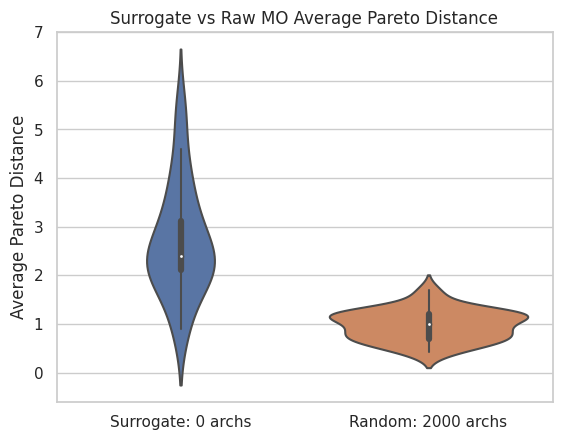

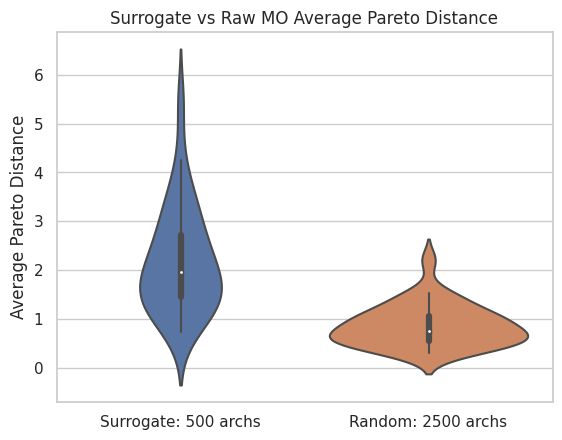

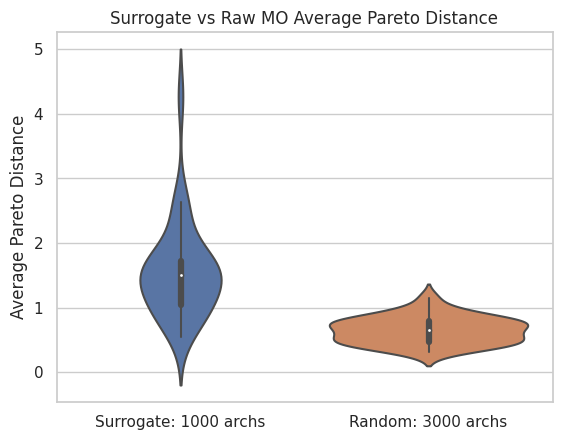

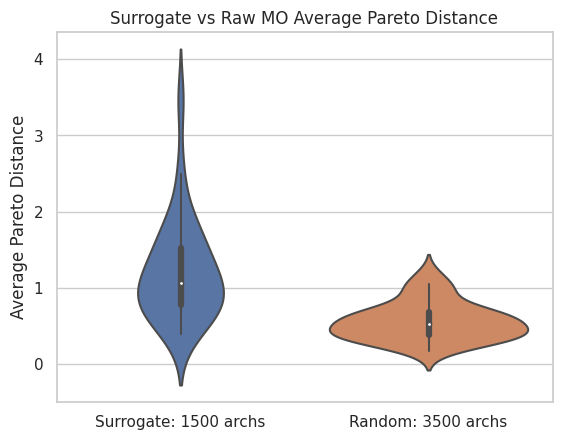

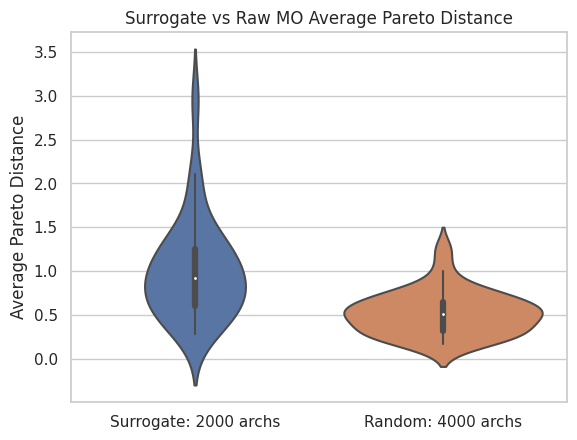

<Figure size 640x480 with 0 Axes>

In [15]:
import seaborn as sns
import numpy as np

raw_mo_arch_sizes = sorted(list(raw_mo_results.keys()))
surr_mo_arch_sizes = sorted(list(surr_mo_results.keys()))

metric = "podist_avg"
x_label = ""
y_label = "Average Pareto Distance"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
    raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])
    surr_label = f"Surrogate: {surr_mo_arch_sizes[i]} archs"
    rand_label = f"Random: {raw_mo_arch_sizes[i]} archs"
    df = pd.DataFrame({surr_label: surr_best_metric, rand_label: raw_best_metric})
    sns.set(style="whitegrid")
    sns.violinplot(data=df, showmeans=True)
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    #plt.savefig(f"../analysis/plots/violin_{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    plt.show()
    plt.clf()



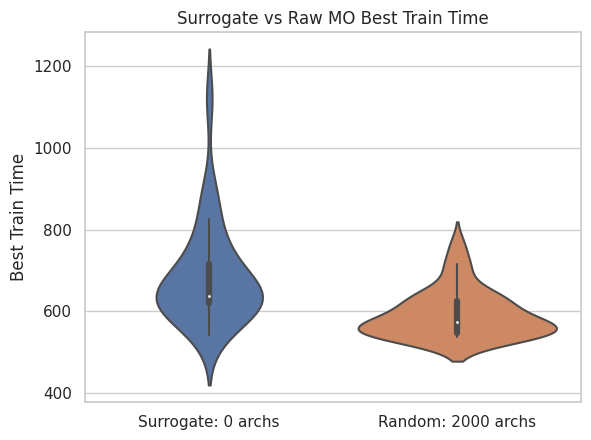

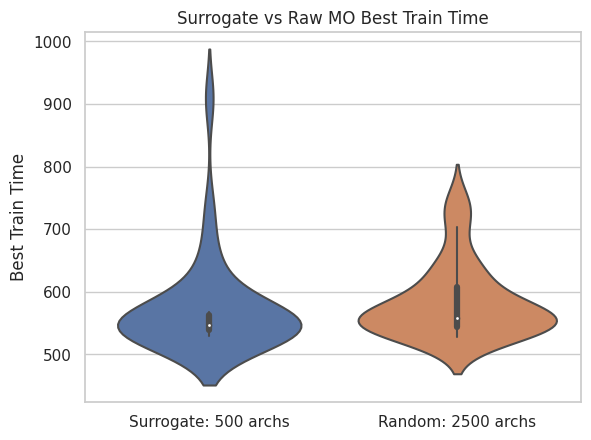

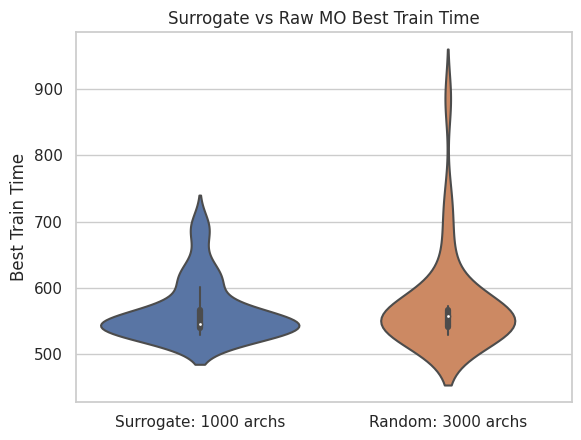

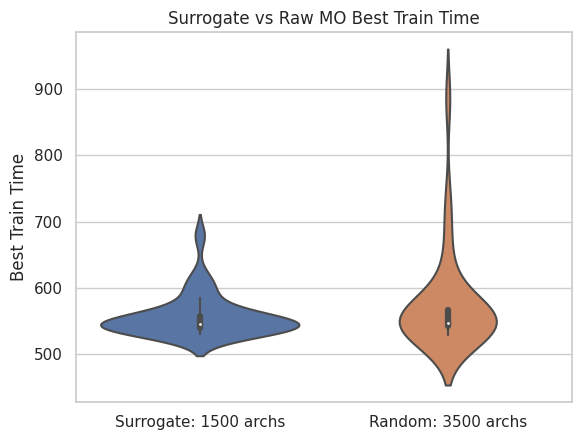

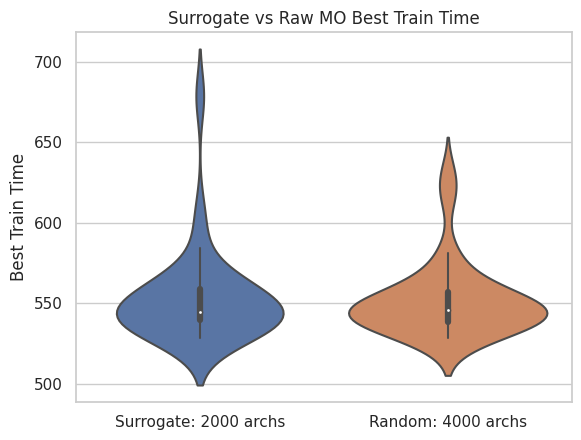

<Figure size 640x480 with 0 Axes>

In [90]:
import seaborn as sns
import numpy as np

metric = "best_train_time"
x_label = ""
y_label = "Best Train Time"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
    raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])
    surr_label = f"Surrogate: {surr_mo_arch_sizes[i]} archs"
    rand_label = f"Random: {raw_mo_arch_sizes[i]} archs"
    df = pd.DataFrame({surr_label: surr_best_metric, rand_label: raw_best_metric})
    sns.set(style="whitegrid")
    sns.violinplot(data=df, showmeans=True)
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    plt.savefig(f"../analysis/plots/violin_{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    plt.show()
    plt.clf()



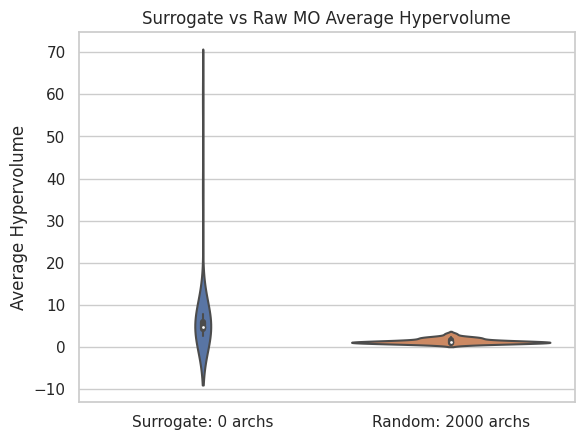

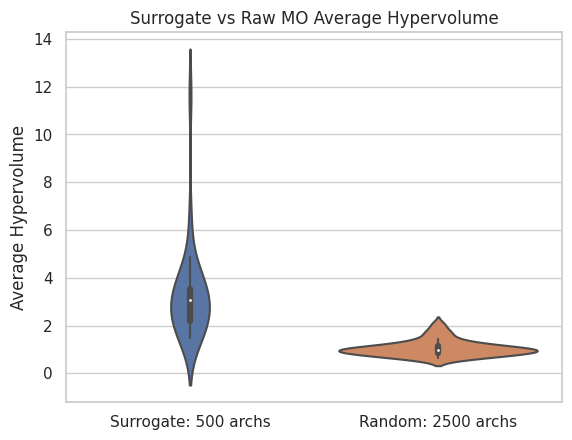

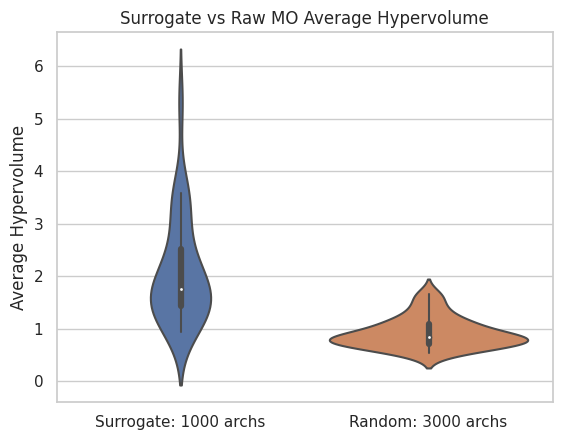

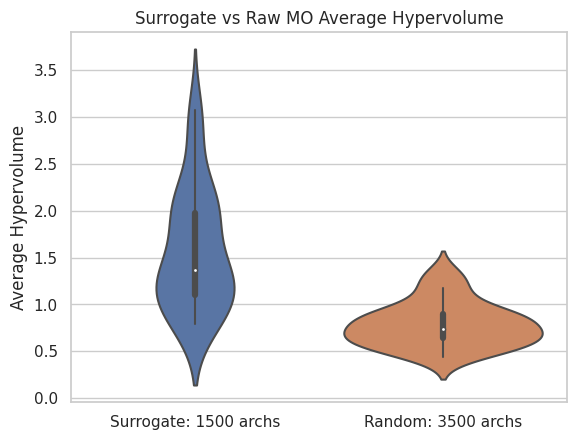

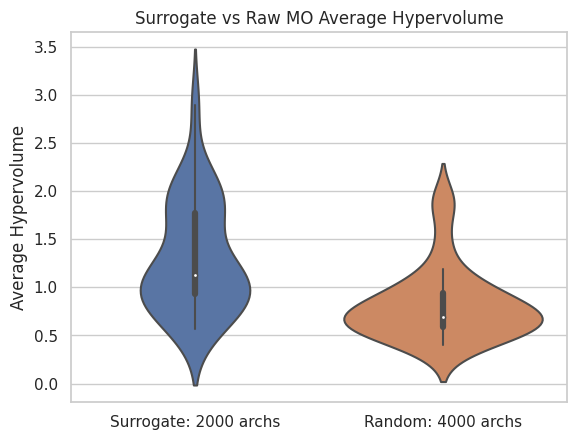

<Figure size 640x480 with 0 Axes>

In [16]:
import seaborn as sns
import numpy as np

metric = "avg_hypervolume"
x_label = ""
y_label = "Average Hypervolume"
for i in range(len(raw_mo_arch_sizes)):
    surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
    raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])
    surr_label = f"Surrogate: {surr_mo_arch_sizes[i]} archs"
    rand_label = f"Random: {raw_mo_arch_sizes[i]} archs"
    df = pd.DataFrame({surr_label: surr_best_metric, rand_label: raw_best_metric})
    sns.set(style="whitegrid")
    sns.violinplot(data=df, showmeans=True)
    plt.ylabel(y_label)
    plt.title(f"Surrogate vs Raw MO {y_label}")
    plt.savefig(f"../analysis/plots/violin_{metric}_surr{surr_mo_arch_sizes[i]}_raw{raw_mo_arch_sizes[i]}.png")
    plt.show()
    plt.clf()



### T-Test

In [50]:
import scipy.stats as stats

# Sample data from the two distributions (replace with your actual data)
#data1 = [1.2, 2.5, 3.1, 4.8, 5.5]
#data2 = [1.0, 2.3, 3.0, 4.5, 5.2]
i = 3
metric = "best_acc"

surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])

# Perform a two-sample t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(surr_best_metric, raw_best_metric, equal_var=False)
print(p_value)
# Set your significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")


5.573553520205651e-05
Reject the null hypothesis: There is a significant difference between the distributions.


In [ ]:
raw_mo_arch_sizes

### Mann-Whitney U Test

In [43]:
from scipy import stats

# Sample data (replace with your actual data)
#raw_mo_arch_sizes = sorted(list(raw_mo_results.keys()))
#surr_mo_arch_sizes = sorted(list(surr_mo_results.keys()))
i = 3
metric = "hypervolume"

surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])

# Perform the Mann-Whitney U test
U_statistic, p_value = stats.mannwhitneyu(surr_best_metric, raw_best_metric)
print("U-Statistic:", U_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: Distributions are not significantly different.")


U-Statistic: 268.0
P-Value: 0.003644180232517045
Reject the null hypothesis: Distributions are significantly different.


### Kolmogorov Smirnov Test

In [73]:
import scipy.stats as stats

# Sample data from the two distributions (replace with your actual data)
#data1 = [1.2, 2.5, 3.1, 4.8, 5.5]
#data2 = [1.0, 2.3, 3.0, 4.5, 5.2]
i = 2
metric = "best_train_time"

surr_best_metric = np.array([surr_mo_results[surr_mo_arch_sizes[i]][seed][metric] for seed in surr_mo_results[surr_mo_arch_sizes[i]].keys()])
raw_best_metric = np.array([raw_mo_results[raw_mo_arch_sizes[i]][seed][metric] for seed in raw_mo_results[raw_mo_arch_sizes[i]].keys()])

np.random.shuffle(surr_best_metric)
np.random.shuffle(raw_best_metric)

ks_statistic, p_value = stats.ks_2samp(surr_best_metric, raw_best_metric)
print("KS-Statistic:", ks_statistic)
print("P-Value:", p_value)

# Set your significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")


KS-Statistic: 0.2
P-Value: 0.5940706297759378
Fail to reject the null hypothesis: There is no significant difference between the distributions.


In [74]:
surr_best_metric

array([556.44799805, 531.20397949, 535.88696289, 540.48095703,
       694.99902344, 637.9420166 , 543.23303223, 614.10095215,
       569.57000732, 547.40698242, 558.2590332 , 535.88696289,
       558.2590332 , 546.42199707, 543.34802246, 537.29199219,
       545.73199463, 545.57702637, 540.68395996, 549.02197266,
       539.81396484, 550.76300049, 615.28295898, 534.5579834 ,
       683.40197754, 539.36096191, 534.5579834 , 610.83203125,
       529.78198242, 601.23095703])

In [75]:
raw_best_metric

array([557.47399902, 563.4909668 , 545.61798096, 537.29199219,
       567.33105469, 730.61798096, 557.83398438, 885.20800781,
       558.58099365, 558.2590332 , 543.34802246, 535.85998535,
       616.67895508, 557.22900391, 547.01800537, 567.33105469,
       629.84899902, 569.24401855, 684.02502441, 537.29199219,
       541.05895996, 528.36199951, 545.04101562, 572.75299072,
       543.27600098, 535.88696289, 539.98199463, 543.23303223,
       558.53796387, 528.36199951])

In [77]:
stat, p = stats.shapiro(raw_best_metric)
print("Shapiro-Wilk Test Statistic:", stat)
print("P-Value:", p)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Data may be normally distributed.")

Shapiro-Wilk Test Statistic: 0.5796620845794678
P-Value: 4.1582616461255384e-08
Reject the null hypothesis: Data is not normally distributed.


<AxesSubplot:ylabel='Count'>

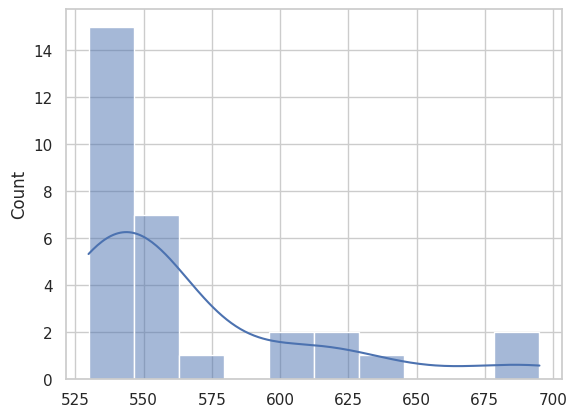

In [82]:
sns.histplot(surr_best_metric, kde=True)

<AxesSubplot:ylabel='Count'>

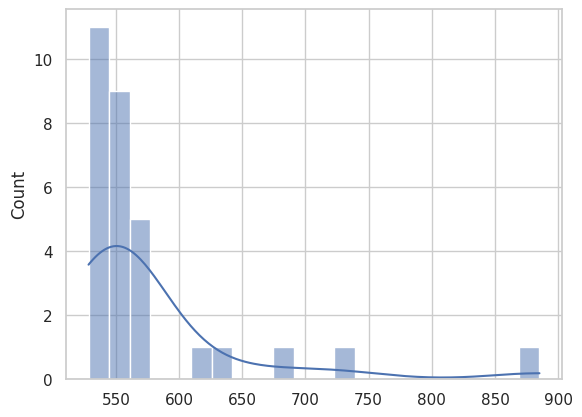

In [83]:
sns.histplot(raw_best_metric, kde=True)